In [1]:
from typing import List

import torch
import matplotlib.pyplot as plt

In [40]:
def sinusoidal_positional_encoding(pos: torch.LongTensor, dim: int, scalar: int = 10_000):
    assert dim % 2 == 0
    device = pos.get_device()
    device = "cpu" if device < 0 else device
    pos = pos.unsqueeze(-1).expand(-1, dim)
    k = (torch.arange(start=0, end=dim / 2, device=device).unsqueeze(-1) + 1).expand(-1, 2).reshape(1, -1)
    w_k = 1 / (scalar ** ((2 * k) / dim))
    i = torch.arange(start=0, end=dim, device=device).unsqueeze(0)
    even = i % 2 == 0
    uneven = i % 2 == 1
    return even * torch.sin(w_k * pos) + uneven * torch.cos(w_k * pos)

In [70]:
pe = sinusoidal_positional_encoding(torch.arange(start=0, end=100), 16)

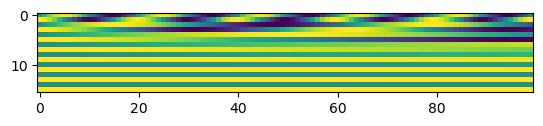

In [71]:
fig, ax = plt.subplots()
ax.imshow(pe.T)